# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 3rd, 2025 at 23:55. Hand in your files via DTU Learn. 

In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import math

## Part 1

From week 1's exercise, I'd like you to complete the "*Exercise 3*: Temporal patterns". The one where the main plot is the year-by-year evolution of the 10 focus crimes.

**IMPORTANT**: FOR THIS AND ALL SUBSEQUENT EXERCISES, I WANT YOU TO USE THE FULL DATASET FROM 2003 TO 2025.

In [4]:
# read the dataset
data = pd.read_csv('../data/police_incidents.csv')

# define the 10 focus crimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

# filter the data to only include the focus crimes
data_focus = data[data['Incident Category'].isin(focuscrimes)]


Important preprocessing steps made to the file containing the full dataset: 
- Not relevat columns were deleted and columns with different names in the two given datasets where renamed to the same name. 
- Date-type columns where processed to have the same format in both datasets
- Data in columns 'Incident Category', 'Incident Description' and 'Police District' was converted to upper case for all instances. 
- Rows with missing values were dropped. 
- Categories that were named with synonyms were grouped under the title of the pertinent focus crime. 


Year with most crimes:  2018

Year with least crimes:  2025 



/var/folders/tf/4m3mvmrd1ddgcyk882fq_c140000gn/T/ipykernel_56327/3042318818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus['Incident Year'] = pd.to_datetime(data_focus['Incident Date']).dt.year


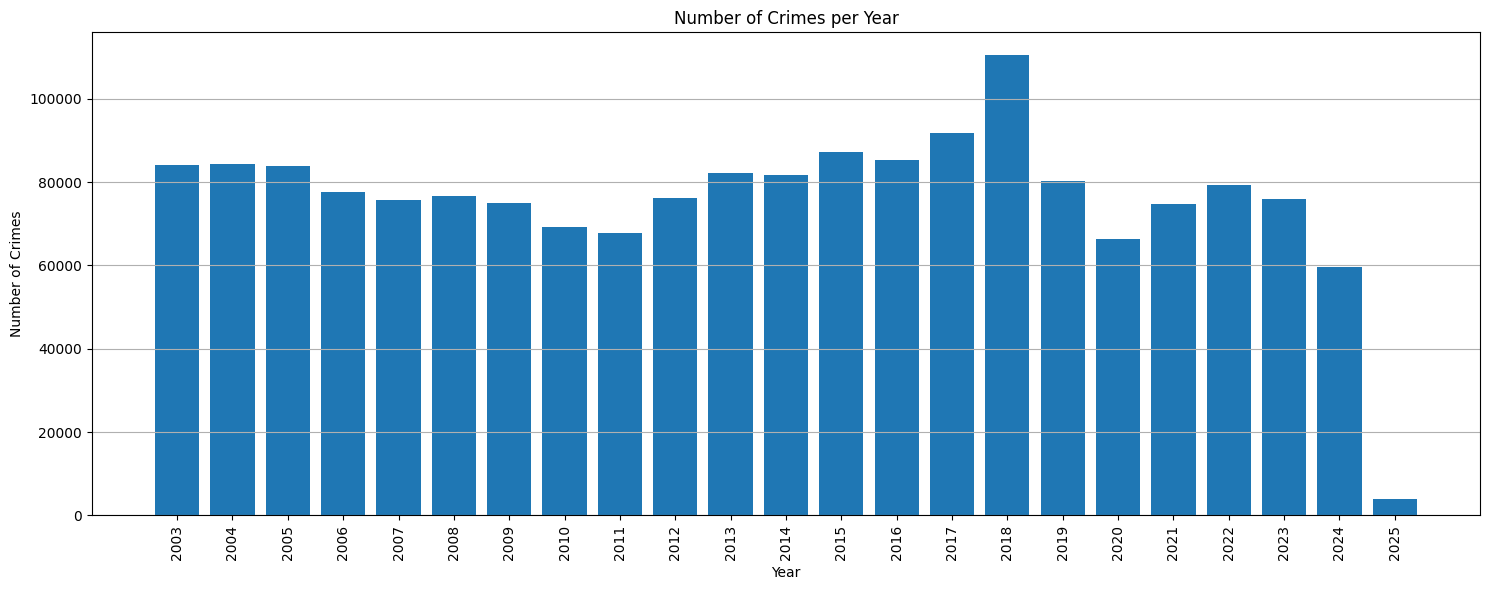

In [5]:
# Number of crimes per year

# count number of crimes per year
data_focus['Incident Year'] = pd.to_datetime(data_focus['Incident Date']).dt.year
crimes_per_year = data_focus['Incident Year'].value_counts().sort_index()

# year with most crimes
year_with_most_crimes = crimes_per_year.idxmax()
print('\nYear with most crimes: ', year_with_most_crimes)

# year with least crimes
year_with_least_crimes = crimes_per_year.idxmin()
print('\nYear with least crimes: ', year_with_least_crimes, '\n')

# bar plot of the number of crimes per year
plt.figure(figsize=(15, 6))
plt.bar(crimes_per_year.index, crimes_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Year')
plt.xticks(crimes_per_year.index, rotation=90)  # Rotate the x-axis labels vertically
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**What is the year with most focus crimes?**

The year with most focus crimes is 2018, with more than 100.000 crimes. 

**What is the year with the fewest focus crimes?**

The year with the fewest focus crimes, without taking into account 2025, as it does not contain information of the whole year, is 2024, with a little bit less than 60.000 crimes, suprisingly below 2020. 

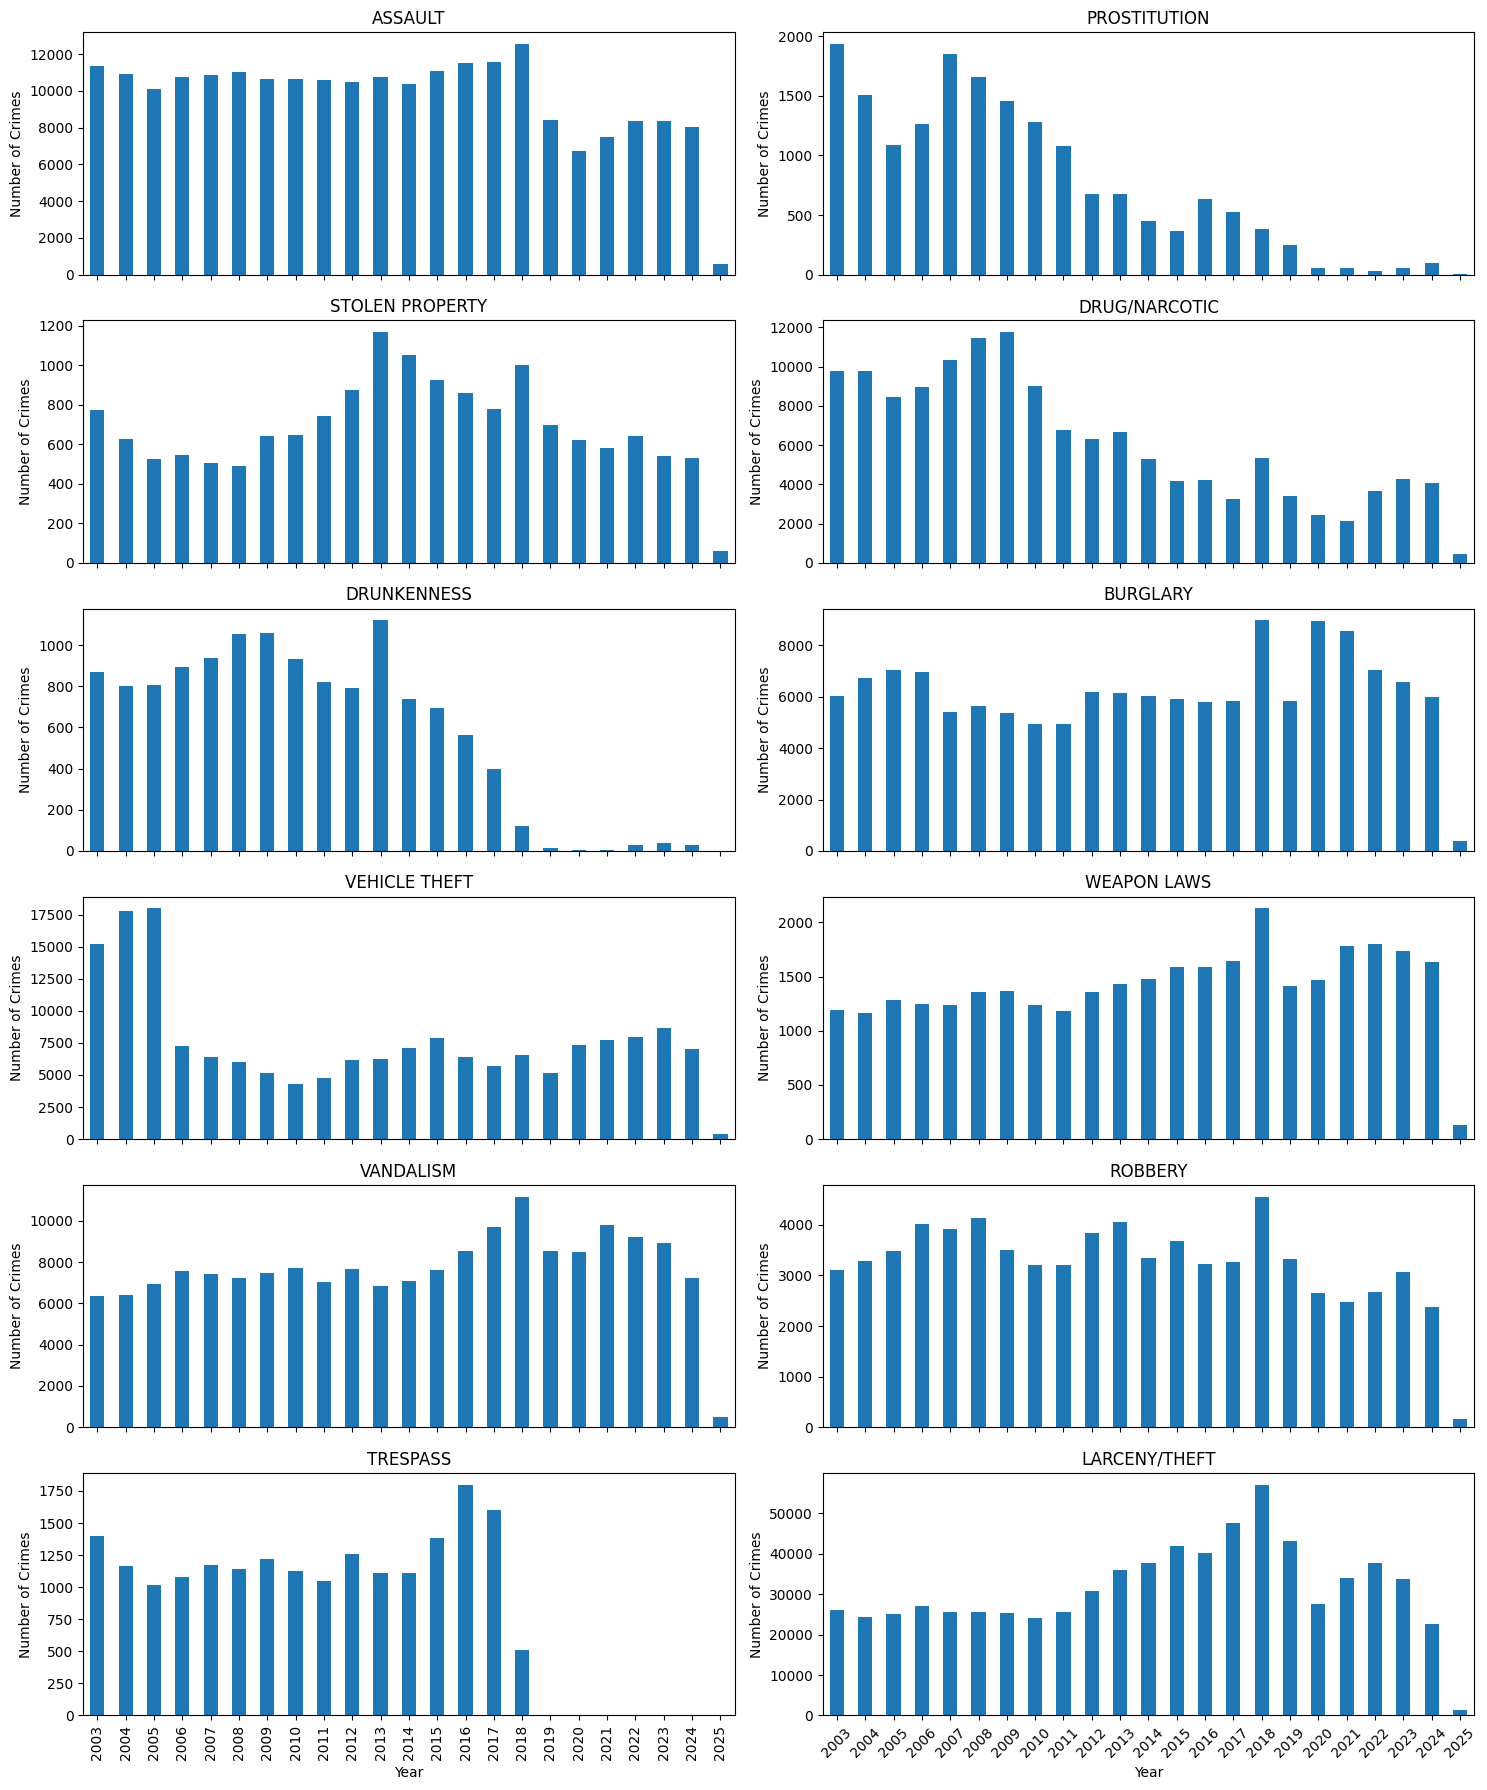

In [6]:
# Create bar-charts displaying the year-by-year development of each of these categories.

# Group data by category and year
category_year_counts = data_focus.groupby('Incident Category')['Incident Year'].value_counts().unstack()

# Define the number of rows and columns of the subplots
num_cols = 2
num_categories = len(focuscrimes)
num_rows = math.ceil(num_categories / num_cols)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows), sharex=True)
axes = axes.flatten()

for i, category in enumerate(focuscrimes):
    category_year_counts.loc[category].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{category}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Crimes')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Comment on at least three interesting trends in your plot:**

Several observations can be made from the plots. 
- First, there is a noticeable decrease in crimes related to drugs and narcotics, as well as prostitution, over the years. Drug-related crimes peaked in 2009 and have been declining since then. Prostitution-related crimes peaked in 2007 and have also been decreasing. While prostitution crimes appear to be nearly disappearing, drug-related crimes, although reduced, still occur relatively frequently.
- Second, vehicle theft crimes experienced a significant increase between 2003 and 2005. After this period, the number of vehicle thefts decreased but has remained relatively stable since 2006, indicating that vehicle theft is still a persistent issue.
- Crimes such as assault, weapon law violations, and robbery have remained relatively constant over the years. This consistency suggests that these types of crimes are ongoing issues that require continuous monitoring and intervention.
- Finally, crimes related to drunkenness and trespassing appear to be underreported or not monitored from 2019 onwards, as there is very little or no data collected for these crimes in the most recent period. This lack of data could indicate changes in reporting practices or enforcement priorities.

## Part 2

Next, I would like you to answer some of the questions related to the videos shown during week 2. Specifically, I would like you to

* Answer questions related to the main video-lecture on Data Visualization. (Where the first question is "What is the difference between *data* and *metadata*?")

    * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?
    
    If we specify the definitions for the GPS example, data would be the actual recorded activities, like the distance or heart rate, while the metadata would be the information about this data, such as the data collection method or the GPS accuracy.  

    * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 

    Yes, we agree that the human eye is a great tool for data analysis, however, it is not good in all the tasks. We would say that the eye is good at recognizing patterns and detecting outliers, these are two well-known facts, as we, for example, are very good at recognizing familiar faces, even though they change a little bit (they get a haircut or wear glasses). However, we also know that it has some limitations. For example, it can have trouble tracking fast-moving objects, because we have a limited number of frames per second that we can process. 


    * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
    
    Another example that could explain Simpson’s paradox could be the comparison of the effectiveness of two new drugs. Imagine you have two drugs in a clinical trial phase, and you test these two drugs in different groups of different sizes. In each individual group, drug 1, for example, could be better than drug 2. However, what is important to know is the overall success rate of the drug. In this case, if drug 2 has a larger number of participants in the groups where its success rate is higher, and drug 1 has smaller groups where its effectiveness is higher, the final result would show that drug 2 is more effective overall, even though it is outperformed by drug 1 in every individual group.

    * In your own words, explain the difference between *exploratory* and *explanatory* data analysis.

    Exploratory data analysis is when you investigate a dataset to understand its main characteristics, detect patterns or identify relationships. Its goal is to explore the data and discover insights. On the other hand, explanatory data analysis is when we already have insights of the data and we want to communicate them.



* Answer questions related to the video on "Nice plots". That is, generate the list of 10 rules for nice plots.
    1. When displaying multiple plots, use subplots. 
    2. Optimize spacing with plt.tight_layout()
    3. Always add labels!
    4. Choose meaningful axis values, they don't necessarly need to be the default ones. 
    5. Ensure legends and annotations don't overlap with the data. 
    6. Adjust the values of the y-axis to a correct scale, taking into account the data context.
    7. In subplots, axes should be comparable, so y-axis scales and limits should be consistent across plots. 
    8. Keep plots simple, include only the essential components and data.
    9. Change the default font and maintain a consistent font style across all plots you do for a particular project. 
    10. Add meaningful captions: include a headline for context and a brief explanation for each figure.

## Part 3

We stay with week 2. I would also like you to complete the exercise in Week 2, Part 4, entitled "*Exercise*: Other cool ways to plot temporal data" (the one where we explore alternatives to bar-plots, such as calendar plots, for plotting temporal data).

In the exercise, i ask you to explore 3 different types of plots. For this assignment, you only need to do a calendar and polar bar chart.


## Part 4

From week 3, I'd like you to work on the exercise contained in Week 3, Part 3. Specifically, I would like you to **both** complete "*Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset" and "*Excercise Part 2*". These exercises focus on reproducing figure 2.1, 2.4 and 2.11 and exploring a few more ideas from the book using data from SFPD.


## Part 5

Finally, I'd like you to work on the exercise "*Exercise*: Using all the tools to understand the temporal trends of prostitution in SF over time" in Week 4, Part 3. 